In [327]:
import random
import numpy as np
import matplotlib.pyplot as plt

class TrafficSimulation:

    def __init__(self, road_length=100, prob_slow=0.5,
                 max_speed=5, times=[], scale = 0):
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            road_length (int) The number of cells in the road. Default: 100.

            prob_slow (float) The probability that a car will randomly slow down
              by 1 during an update step. Default: 0.5.

            max_speed (int) The maximum speed in car cells per update step.
              Default: 5.
              
            times (list) A list of sublists where each sublist is a sequence 
            of time steps at which a given traffic light must be red
            
            scale (int) A scale parameter of exponential distribution which 
            represents expected time between two cars entering a lane
        '''
        self.road_length = road_length
        self.max_speed = max_speed
        self.prob_slow = prob_slow
        self.scale = scale
        self.times = times
        
        #counters to send new cars from exponential distribution
        #every time I add a car, I will add a number drawn from expon. dist to the counter
        #and if current time==counter, then a new car with random speed is added (see line __)
        self.count1 = 1
        self.count2 = 1
        self.count3 = 1
        self.count4 = 1
        
        #recording time steps at which a traffic jam occured
        self.section1 = []
        self.section2 = []
        self.section3 = []
        
        # Create empty roads: -1 means empty in this simulation
        self.state = np.full(self.road_length, -1, dtype=int)
        self.state2 = np.full(self.road_length, -1, dtype=int)
        self.state3 = np.full(self.road_length, -1, dtype=int)
        self.state4 = np.full(self.road_length, -1, dtype=int)
        
        # Keep track of the time steps and average traffic density at each step
        self.time_step = 0
        self.average_traffic_density1 = []
        self.average_traffic_density2 = []
        self.average_traffic_density3 = []
        self.average_traffic_density4 = []
        
        #set up locations of different traffic lights
        self.tl1 = self.tl2 = self.tl7 = self.tl8 = self.road_length//3
        self.tl3 = self.tl4 =  self.tl5 = self.tl6 = (self.road_length//3)*2

        #initializing all traffic lights
        self.state2[self.tl1] = -2 
        self.state[self.tl2] = -3
        self.state2[self.tl3] = -2
        self.state3[self.tl4] = -3
        self.state4[self.tl5] = -2
        self.state[self.tl6] = -3
        self.state4[self.tl7] = -2 
        self.state3[self.tl8] = -3
        
    def update(self):
        '''
        Advance one time step in the simulation.
        '''
        #traffic light 1
        if self.time_step in self.times[0]:
            self.state2[self.tl1] = -2
        else:
            self.state2[self.tl1] = -3
            
        #traffic light 2
        if self.time_step in self.times[1]:
            self.state[self.tl2] = -2
        else:
            self.state[self.tl2] = -3
           
        #traffic light 3
        if self.time_step in self.times[2]:
            self.state2[self.tl3] = -2
        else:
            self.state2[self.tl3] = -3
            
        #traffic light 4
        if self.time_step in self.times[3]:
            self.state3[self.tl4] = -2
        else:
            self.state3[self.tl4] = -3
            
        #traffic light 5
        if self.time_step in self.times[4]:
            self.state4[self.tl5] = -2
        else:
            self.state4[self.tl5] = -3
            
        #traffic light 6
        if self.time_step in self.times[5]:
            self.state[self.tl6] = -2
        else:
            self.state[self.tl6] = -3
            
        #traffic light 7
        if self.time_step in self.times[6]:
            self.state4[self.tl7] = -2
        else:
            self.state4[self.tl7] = -3
            
        #traffic light 8
        if self.time_step in self.times[7]:
            self.state3[self.tl8] = -2
        else:
            self.state3[self.tl8] = -3
                     
        
        # Update car speeds for road 1 (Bush st.)
        for i in range(self.road_length):
            if self.state[i] != -1 and self.state[i] != -2 and self.state[i] != -3:
                # Distance is the number of empty cells between this car and the
                # next car plus 1
                distance = 1
                while self.state[(i + distance) % self.road_length] == -1 or self.state[(i + distance) % self.road_length] == -2 or self.state[(i + distance) % self.road_length] == -3:
                    distance += 1
                # Acceleration
                if self.state[i] < self.max_speed:
                    self.state[i] += 1
                #Deceleration
                #we are checking if the car is before a red traffic light and if yes, it fully decelerates
                if i != self.tl2-1 and i != self.tl6-1 and self.state[i] >= distance:
                    self.state[i] = distance - 1
                if i==self.tl2-1 or i==self.tl6-1 and self.state[self.tl2]== -2 and self.state[i] >= distance:
                    self.state[i] = 0
                if i==self.tl2-1 or i==self.tl6-1 and self.state[self.tl2]== -3 and self.state[i] >= distance:
                    self.state[i] = distance - 1
                #making sure that the maximum volcity is not exceeded
                if self.state[i] > self.max_speed:
                    self.state[i] = self.max_speed
                    
        # Update car speeds for road 2 (Jones St)           
        for i in range(self.road_length):
            if self.state2[i] != -1 and self.state2[i] != -2 and self.state2[i] != -3:
                # Distance is the number of empty cells between this car and the
                # next car plus 1
                distance = 1
                while self.state2[(i + distance) % self.road_length] == -1 or self.state2[(i + distance) % self.road_length] == -2 or self.state2[(i + distance) % self.road_length] == -3:
                    distance += 1
                # Acceleration
                if self.state2[i] < self.max_speed:
                    self.state2[i] += 1
                # Deceleration
                if i != self.tl1-1 and i != self.tl3-1 and self.state2[i] >= distance:
                    self.state2[i] = distance - 1
                if i==self.tl1-1 or i==self.tl3-1 and self.state2[self.tl3]== -2 and self.state2[i] >= distance:
                    self.state2[i] = 0
                if i==self.tl1-1 or i==self.tl3-1 and self.state2[self.tl3]== -3 and self.state2[i] >= distance:
                    self.state2[i] = distance - 1
                if self.state2[i] > self.max_speed:
                    self.state2[i] = self.max_speed
                # Randomization
                if (
                    (self.state2[i] > 0) and
                    (np.random.uniform() < self.prob_slow)
                ):
                    self.state2[i] -= 1

        # Update car speeds for road 3 (Sutter St)        
        for i in range(self.road_length):
            if self.state3[i] != -1 and self.state3[i] != -2 and self.state3[i] != -3:
                # Distance is the number of empty cells between this car and the
                # next car plus 1
                distance = 1
                while self.state3[(i + distance) % self.road_length] == -1 or self.state3[(i + distance) % self.road_length] == -2 or self.state3[(i + distance) % self.road_length] == -3:
                    distance += 1
                # Acceleration
                if self.state3[i] < self.max_speed:
                    self.state3[i] += 1
                # Deceleration
                if i != self.tl8-1 and i != self.tl4-1 and self.state3[i] >= distance:
                    self.state3[i] = distance - 1
                if i==self.tl8-1 or i==self.tl4-1 and self.state3[self.tl8]== -2 and self.state3[i] >= distance:
                    self.state3[i] = 0
                if i==self.tl8-1 or i==self.tl4-1 and self.state3[self.tl8]== -3 and self.state3[i] >= distance:
                    self.state3[i] = distance - 1
                if self.state3[i] > self.max_speed:
                    self.state3[i] = self.max_speed
                # Randomization
                if (
                    (self.state3[i] > 0) and
                    (np.random.uniform() < self.prob_slow)
                ):
                    self.state3[i] -= 1
                    
        # Update car speeds for road 4 (Taylor St)     
        for i in range(self.road_length):
            if self.state4[i] != -1 and self.state4[i] != -2 and self.state4[i] != -3:
                # Distance is the number of empty cells between this car and the
                # next car plus 1
                distance = 1
                while self.state4[(i + distance) % self.road_length] == -1 or self.state4[(i + distance) % self.road_length] == -2 or self.state4[(i + distance) % self.road_length] == -3:
                    distance += 1
                # Acceleration
                if self.state4[i] < self.max_speed:
                    self.state4[i] += 1
                # Deceleration
                if i != self.tl7-1 and i != self.tl5-1 and self.state4[i] >= distance:
                    self.state4[i] = distance - 1
                if i==self.tl7-1 or i==self.tl5-1 and self.state4[self.tl7]== -2 and self.state4[i] >= distance:
                    self.state4[i] = 0
                if i==self.tl7-1 or i==self.tl5-1 and self.state4[self.tl7]== -3 and self.state4[i] >= distance:
                    self.state4[i] = distance - 1
                if self.state4[i] > self.max_speed:
                    self.state4[i] = self.max_speed
                # Randomization
                if (
                    (self.state4[i] > 0) and
                    (np.random.uniform() < self.prob_slow)
                ):
                    self.state4[i] -= 1


        # Move cars forward using their new speeds
        new_state = np.full(self.road_length, -1, dtype=int)
        new_state[self.tl2] = self.state[self.tl2]
        new_state[self.tl6] = self.state[self.tl6]
        
        # Move cars forward using their new speeds
        new_state2 = np.full(self.road_length, -1, dtype=int)
        new_state2[self.tl1] = self.state2[self.tl1]
        new_state2[self.tl3] = self.state2[self.tl3]
        
        # Move cars forward using their new speeds
        new_state3 = np.full(self.road_length, -1, dtype=int)
        new_state3[self.tl8] = self.state3[self.tl8]
        new_state3[self.tl4] = self.state3[self.tl4]
        
        # Move cars forward using their new speeds
        new_state4 = np.full(self.road_length, -1, dtype=int)
        new_state4[self.tl7] = self.state4[self.tl7]
        new_state4[self.tl5] = self.state4[self.tl5]
        
        #Updating positions for road 1
        for i in range(self.road_length):
            cell = self.state[i]
            if cell != -1 and cell != -2 and cell != -3:
                #checking if the first traffic light is red and stopping the car before it 
                if i < self.tl2 and cell+i in list(np.linspace(self.tl2,self.tl2+4, 5)) and self.state[self.tl2]== -2:
                    new_state[self.tl2-1] = 0
                #checking if the second traffic light is red and stopping the car before it 
                elif i > self.tl2 and i < self.tl6 and cell+i in list(np.linspace(self.tl6,self.tl6+4, 5)) and self.state[self.tl6]== -2:
                    new_state[self.tl6-1] = 0
                elif i < self.tl2 and cell+i in list(np.linspace(self.tl2,self.tl2+4, 5)) and self.state[self.tl2]== -3:
                    a = random.uniform(0,1)
                    #if the traffic light is greeen and the car is about to replace the traffic light, 
                    #put it in the next cell (hence, the traffic light cell cannot get changed)
                    if a < 0.5 and ((i + cell)) == self.tl2:
                        new_state[(i + cell + 1)] = cell
                    elif a < 0.5 and ((i + cell)) != self.tl2: 
                        new_state[(i + cell)] = cell
                    #here, the car is turning to Jones St.
                    elif a > 0.5 and ((i + cell)) == self.tl2:
                        new_state2[(i + cell + 1)] = cell
                    elif a > 0.5 and ((i + cell)) != self.tl2:
                        new_state2[(i + cell)] = cell
                elif i > self.tl2 and i < self.tl6 and cell+i in list(np.linspace(self.tl6,self.tl6+4, 5)) and self.state[self.tl6]== -3:
                    a = random.uniform(0,1)
                    #if the traffic light is greeen and the car is about to replace the traffic light, 
                    #put it in the next cell (hence, the traffic light cell cannot get changed)
                    if a < 0.5 and (i + cell) == self.tl6:
                        new_state[(i + cell + 1)] = cell
                    elif a < 0.5 and ((i + cell)) != self.tl6: 
                        new_state[(i + cell)] = cell
                    #Here the car is turning to Taylor St
                    elif a > 0.5 and ((i + cell)) == self.tl6:
                        new_state4[(i + cell + 1)] = cell
                    elif a > 0.5 and ((i + cell)) != self.tl6:
                        new_state4[(i + cell)] = cell
                elif i + cell >= self.road_length or cell == 0 and i==49:
                    pass
                else:
                    new_state[(i + cell)] = cell
                            
        self.state = new_state
        
        #road2
        for i in range(self.road_length):
            cell = self.state2[i]
            if cell != -1 and cell != -2 and cell != -3:
                #checking if the first traffic light is red and stopping the car before it 
                if i < self.tl1 and cell+i in list(np.linspace(self.tl1,self.tl1+4, 5)) and self.state2[self.tl1]== -2:
                    new_state2[self.tl1-1] = 0
                #checking if the second traffic light is red and stopping the car before it 
                elif i > self.tl1 and i < self.tl3 and cell+i in list(np.linspace(self.tl3,self.tl3+4, 5)) and self.state2[self.tl3]== -2:
                    new_state2[self.tl3-1] = 0
                elif i < self.tl1 and cell+i in list(np.linspace(self.tl1,self.tl1+4, 5)) and self.state2[self.tl1]== -3:
                    a = random.uniform(0,1)
                    #if the traffic light is greeen and the car is about to replace the traffic light, 
                    #put it in the next cell (hence, the traffic light cell cannot get changed)
                    if a < 0.5 and ((i + cell)) == self.tl1:
                        new_state2[(i + cell + 1)] = cell
                    elif a < 0.5 and ((i + cell)) != self.tl1: 
                        new_state2[(i + cell)] = cell
                    elif a > 0.5 and ((i + cell)) == self.tl1:
                        new_state[(i + cell + 1)] = cell
                    elif a > 0.5 and ((i + cell)) != self.tl1:
                        new_state[(i + cell)] = cell
                elif i > self.tl1 and i < self.tl3 and cell+i in list(np.linspace(self.tl3,self.tl3+4, 5)) and self.state2[self.tl3]== -3:
                    a = random.uniform(0,1)
                    #if the traffic light is greeen and the car is about to replace the traffic light, 
                    #put it in the next cell (hence, the traffic light cell cannot get changed)
                    if a < 0.5 and ((i + cell)) == self.tl3:
                        new_state2[(i + cell + 1)] = cell
                    elif a < 0.5 and ((i + cell)) != self.tl3: 
                        new_state2[(i + cell)] = cell
                    elif a > 0.5 and ((i + cell)) == self.tl3:
                        new_state3[(i + cell + 1)] = cell
                    elif a > 0.5 and ((i + cell)) != self.tl3:
                        new_state3[(i + cell)] = cell
                #if the car is leaving the road, it does not appear from a beginning again
                elif i + cell >= self.road_length or cell == 0 and i==49:
                    pass
                else:
                    new_state2[(i + cell)] = cell

        self.state2 = new_state2
        
        #road3
        for i in range(self.road_length):
            cell = self.state3[i]
            if cell != -1 and cell != -2 and cell != -3:
                #checking if the first traffic light is red and stopping the car before it 
                if i < self.tl8 and cell+i in list(np.linspace(self.tl8,self.tl8+4, 5)) and self.state3[self.tl8]== -2:
                    new_state3[self.tl8-1] = 0
                #checking if the second traffic light is red and stopping the car before it 
                elif i > self.tl8 and i < self.tl4 and cell+i in list(np.linspace(self.tl4,self.tl4+4, 5)) and self.state3[self.tl4]== -2:
                    new_state3[self.tl4-1] = 0
                elif i < self.tl8 and cell+i in list(np.linspace(self.tl8,self.tl8+4, 5)) and self.state3[self.tl8]== -3:
                    a = random.uniform(0,1)
                    #if the traffic light is greeen and the car is about to replace the traffic light, 
                    #put it in the next cell (hence, the traffic light cell cannot get changed)
                    if a < 0.5 and ((i + cell)) == self.tl8:
                        new_state3[(i + cell + 1)] = cell
                    elif a < 0.5 and ((i + cell)) != self.tl8: 
                        new_state3[(i + cell)] = cell
                    elif a > 0.5 and ((i + cell)) == self.tl8:
                        new_state4[(i + cell + 1)] = cell
                    elif a > 0.5 and ((i + cell)) != self.tl8:
                        new_state4[(i + cell)] = cell
                elif i > self.tl8 and i < self.tl4 and cell+i in list(np.linspace(self.tl4,self.tl4+4, 5)) and self.state3[self.tl4]== -3:
                    a = random.uniform(0,1)
                    #if the traffic light is greeen and the car is about to replace the traffic light, 
                    #put it in the next cell (hence, the traffic light cell cannot get changed)
                    if a < 0.5 and (i + cell) == self.tl4:
                        new_state3[(i + cell + 1)] = cell
                    elif a < 0.5 and ((i + cell)) != self.tl4: 
                        new_state3[(i + cell)] = cell
                    elif a > 0.5 and ((i + cell)) == self.tl4:
                        new_state2[(i + cell + 1)] = cell
                    elif a > 0.5 and ((i + cell)) != self.tl4:
                        new_state2[(i + cell)] = cell
                elif i + cell >= self.road_length or cell == 0 and i==49:
                    pass
                else:
                    new_state3[(i + cell)] = cell
                            
        self.state3 = new_state3
        
        #road 4
        for i in range(self.road_length):
            cell = self.state4[i]
            if cell != -1 and cell != -2 and cell != -3:
                #checking if the first traffic light is red and stopping the car before it 
                if i < self.tl7 and cell+i in list(np.linspace(self.tl7,self.tl7+4, 5)) and self.state4[self.tl7]== -2:
                    new_state4[self.tl2-1] = 0
                #checking if the second traffic light is red and stopping the car before it 
                elif i > self.tl7 and i < self.tl5 and cell+i in list(np.linspace(self.tl5,self.tl5+4, 5)) and self.state4[self.tl5]== -2:
                    new_state4[self.tl5-1] = 0
                elif i < self.tl7 and cell+i in list(np.linspace(self.tl7,self.tl7+4, 5)) and self.state4[self.tl7]== -3:
                    a = random.uniform(0,1)
                    #if the traffic light is greeen and the car is about to replace the traffic light, 
                    #put it in the next cell (hence, the traffic light cell cannot get changed)
                    if a < 0.5 and ((i + cell)) == self.tl7:
                        new_state4[(i + cell + 1)] = cell
                    elif a < 0.5 and ((i + cell)) != self.tl7: 
                        new_state4[(i + cell)] = cell
                    elif a > 0.5 and ((i + cell)) == self.tl7:
                        new_state3[(i + cell + 1)] = cell
                    elif a > 0.5 and ((i + cell)) != self.tl7:
                        new_state3[(i + cell)] = cell
                elif i > self.tl7 and i < self.tl5 and cell+i in list(np.linspace(self.tl5,self.tl5+4, 5)) and self.state4[self.tl5]== -3:
                    a = random.uniform(0,1)
                    #if the traffic light is greeen and the car is about to replace the traffic light, 
                    #put it in the next cell (hence, the traffic light cell cannot get changed)
                    if a < 0.5 and ((i + cell)) == self.tl5:
                        new_state4[(i + cell + 1)] = cell
                    elif a < 0.5 and ((i + cell)) != self.tl5: 
                        new_state4[(i + cell)] = cell
                    elif a > 0.5 and ((i + cell)) == self.tl5:
                        new_state[(i + cell + 1)] = cell
                    elif a > 0.5 and ((i + cell)) != self.tl5:
                        new_state[(i + cell)] = cell
                #if the car is leaving the road, it does not appear from a beginning again
                elif i + cell >= self.road_length or cell == 0 and i==49:
                    pass
                else:
                    new_state4[(i + cell)] = cell

        self.state4 = new_state4
        
        #Checking of the time step reached the next counter value
        #if yes, then we send a new car, draw a number from expon dist
        #and add it to the counter to set up next car's entrance
        if self.time_step == self.count1:
            new_state[0] = random.randint(1,5)
            #using max function helps us setting the minimum waiting time to a 1
            self.count1 += max(int(np.random.exponential(scale=self.scale/2.4)),1)
        
        if self.time_step == self.count2:
            new_state2[0] = random.randint(1,5)
            self.count2 += max(int(np.random.exponential(scale=self.scale)), 1)
            
        if self.time_step == self.count3:
            new_state3[0] = random.randint(1,5)
            self.count3 += max(int(np.random.exponential(scale=self.scale/1.3)), 1)
        
        if self.time_step == self.count4:
            new_state4[0] = random.randint(1,5)
            self.count4 += max(int(np.random.exponential(scale=self.scale/1.5)), 1)

        # Update average traffic density history
        self.average_traffic_density1.append(
            len(self.state[self.state > -1]) / self.road_length)
        self.average_traffic_density2.append(
            len(self.state2[self.state2 > -1]) / self.road_length)
        self.average_traffic_density3.append(
            len(self.state3[self.state3 > -1]) / self.road_length)
        self.average_traffic_density4.append(
            len(self.state4[self.state4 > -1]) / self.road_length)
        self.time_step += 1
        
        if len(self.state[0:16][self.state[0:16] > -1]) == 16:
            self.section1.append(self.time_step)
        if len(self.state[17:32][self.state[17:32] > -1]) == 15:
            self.section2.append(+self.time_step)
        if len(self.state[33:52][self.state[33:52] > -1]) == 17:
            self.section3.append(self.time_step)
        
        return self.average_traffic_density1, self.average_traffic_density2, self.average_traffic_density3, self.average_traffic_density4, self.section2
    
    def display(self):
        '''
        Print out the current state of the simulation.
        '''
        return (''.join('.' if x == -1 else str(x) for x in self.state)), (''.join('.' if x == -1 else str(x) for x in self.state2)),(''.join('.' if x == -1 else str(x) for x in self.state3)), (''.join('.' if x == -1 else str(x) for x in self.state4))

In [328]:
times = [[] for _ in range(8)]

#traffic light #1
for i in range(0,1000,85):
    for k in np.linspace(i,i+49,50): times[0].append(int(k))

#traffic light #2
for i in range(50,1000,85):
    for k in np.linspace(i,i+34,35): times[1].append(int(k))
        
#traffic light #3
for i in range(15,1000,85):
    for k in np.linspace(i,i+49,50): times[2].append(int(k))
        
for k in np.linspace(0,14,15): times[3].append(int(k))
#traffic light #4
for i in range(65,1000,85):
    for k in np.linspace(i,i+34,35): times[3].append(int(k))
        
#traffic light #5
for i in range(20,1000,95):
    for k in np.linspace(i,i+54,55): times[4].append(int(k))
    
for k in np.linspace(0,19,20): times[5].append(int(k))
#traffic light #6
for i in range(75,1000,85):
    for k in np.linspace(i,i+39,40): times[5].append(int(k))
        
#traffic light #7
for i in range(0,1000,95):
    for k in np.linspace(i,i+54,55): times[6].append(int(k))
        
#traffic light #8
for i in range(55,1000,85):
    for k in np.linspace(i,i+39,40): times[7].append(int(k))
        
times_alternative = [[] for _ in range(8)]

#traffic light #1
for i in range(0,1000,85):
    for k in np.linspace(i,i+39,40): times[0].append(int(k))

#traffic light #2
for i in range(40,1000,85):
    for k in np.linspace(i,i+44,45): times[1].append(int(k))
        
#traffic light #3
for i in range(10,1000,80):
    for k in np.linspace(i,i+39,40): times[2].append(int(k))
        
for k in np.linspace(0,9,10): times[3].append(int(k))
#traffic light #4
for i in range(50,1000,80):
    for k in np.linspace(i,i+39,40): times[3].append(int(k))
        
#traffic light #5
for i in range(10,1000,80):
    for k in np.linspace(i,i+39,40): times[4].append(int(k))
    
for k in np.linspace(0,9,10): times[5].append(int(k))
#traffic light #6
for i in range(60,1000,80):
    for k in np.linspace(i,i+39,40): times[5].append(int(k))
        
#traffic light #7
for i in range(0,1000,80):
    for k in np.linspace(i,i+39,40): times[6].append(int(k))
        
#traffic light #8
for i in range(40,1000,80):
    for k in np.linspace(i,i+39,40): times[7].append(int(k))

In [329]:
sim = TrafficSimulation(
    road_length=50, max_speed=5, prob_slow=0.2, times=times, scale=12)
initial_state = sim.state.copy()

road1 = []
road2 = []
road3 = []
road4 = []

for i in range(500):
    sim.update()
    road1.append(sim.display()[0])
    road2.append(sim.display()[1])
    road3.append(sim.display()[2])
    road4.append(sim.display()[3])
    
final_state = sim.state.copy()

In [319]:
means = []
for n in range(25):
    section2_avgs = []
    for k in range(25):
        sim = TrafficSimulation(
        road_length=50, max_speed=5, prob_slow=0.2, times=times, scale=12)
        for i in range(750):
            sim.update()
        if len(sim.update()[4]) != 0:
            section2_avgs.append(sim.update()[4][0])
    means.append(np.mean(section2_avgs))
    

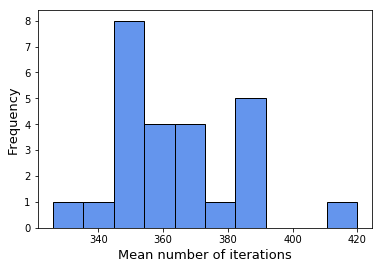

The average first iteration at which a traffic jam occurs between the first and the second traffic light at Bush St is: 363.89
Confidence interval over the mean [334.71, 401.53]


In [326]:
plt.hist(means, edgecolor='black', color='cornflowerblue', bins=10)
plt.ylabel('Frequency', size=13)
plt.xlabel('Mean number of iterations', size=13)
plt.show()
print('The average first iteration at which a traffic jam occurs between the first and the second traffic light at Bush St is:', round(np.mean(means), 2))
print('Confidence interval over the mean', [round(np.percentile(means, 2.5),2 ), round(np.percentile(means,  97.5), 2)])




In [ ]:
n_scales = 11
scales = np.linspace(1, 31, n_scales)

#measuring traffic density with the original strategy
traffic_density_road1 = [[] for _ in range(n_scales)]
traffic_density_road2 = [[] for _ in range(n_scales)]
traffic_desnity_road3 = [[] for _ in range(n_scales)]
traffic_desnity_road4 = [[] for _ in range(n_scales)]

for i in range(len(scales)):
    for simulation in range(100):
        sim = TrafficSimulation(
            road_length=50, max_speed=5, prob_slow=0.2, times=times, scale=scales[i])
        for k in range(100):
            sim.update()
        traffic_density_road1[i].append(np.mean(sim.update()[0]))
        traffic_density_road2[i].append(np.mean(sim.update()[1]))
        traffic_density_road3[i].append(np.mean(sim.update()[2]))
        traffic_density_road4[i].append(np.mean(sim.update()[3]))  

In [ ]:
#measuring traffic density with the alternative strategy
traffic_density_road_alternative1 = [[] for _ in range(n_scales)]
traffic_density_road_alternative2 = [[] for _ in range(n_scales)]
traffic_density_road_alternative3 = [[] for _ in range(n_scales)]
traffic_density_road_alternative4 = [[] for _ in range(n_scales)]

for i in range(len(scales)):
    for simulation in range(100):
        sim = TrafficSimulation(
            road_length=50, max_speed=5, prob_slow=0.2, times=times_alternative, scale=scales[i])
        for k in range(100):
            sim.update()
        traffic_density_road_alternative1[i].append(np.mean(sim.update()[0]))
        traffic_density_road_alternative2[i].append(np.mean(sim.update()[1]))
        traffic_density_road_alternative3[i].append(np.mean(sim.update()[2]))
        traffic_density_road_alternative4[i].append(np.mean(sim.update()[3]))

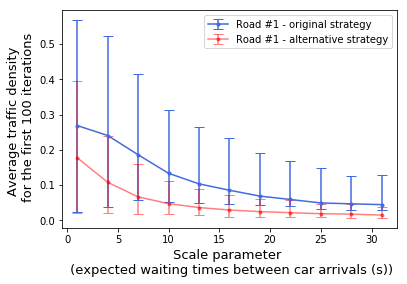

In [231]:
#plotting traffic densities
plt.errorbar(scales, [np.mean(i) for i in traffic_density_road1], np.transpose([[np.percentile(i, 2.5), np.percentile(i, 97.5)] for i in traffic_density_road1]), marker='.', color='royalblue', capsize=5, label = 'Road #1 - original strategy')
plt.errorbar(scales, [np.mean(i) for i in traffic_density_road_alternative1], np.transpose([[np.percentile(i, 2.5), np.percentile(i, 97.5)] for i in traffic_density_road_alternative1]), marker='.', color='red', alpha=0.5, capsize=5, label = 'Road #1 - alternative strategy')

plt.ylabel('Average traffic density \n for the first 100 iterations', size=13)
plt.xlabel('Scale parameter \n (expected waiting times between car arrivals (s))', size=13)
plt.legend()
plt.show()

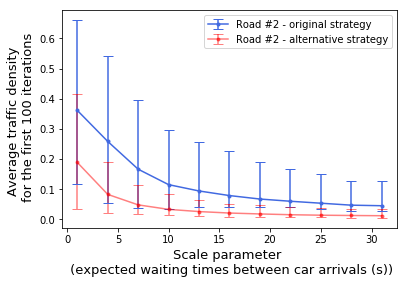

In [232]:
plt.errorbar(scales, [np.mean(i) for i in traffic_density_road2], np.transpose([[np.percentile(i, 2.5), np.percentile(i, 97.5)] for i in traffic_density_road1]), marker='.', color='royalblue', capsize=5,label = 'Road #2 - original strategy')
plt.errorbar(scales, [np.mean(i) for i in traffic_density_road_alternative2], np.transpose([[np.percentile(i, 2.5), np.percentile(i, 97.5)] for i in traffic_density_density_alternative2]), marker='.', color='red', alpha=0.5, capsize=5, label = 'Road #2 - alternative strategy')

plt.ylabel('Average traffic density \n for the first 100 iterations', size=13)
plt.xlabel('Scale parameter \n (expected waiting times between car arrivals (s))', size=13)
plt.legend()
plt.show()

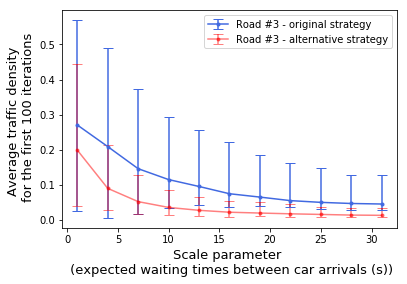

In [233]:
plt.errorbar(scales, [np.mean(i) for i in traffic_density_road3], np.transpose([[np.percentile(i, 2.5), np.percentile(i, 97.5)] for i in traffic_density_road1]), marker='.', color='royalblue', capsize=5, label = 'Road #3 - original strategy')
plt.errorbar(scales, [np.mean(i) for i in traffic_density_road_alternative3], np.transpose([[np.percentile(i, 2.5), np.percentile(i, 97.5)] for i in traffic_density_road_alternative3]), marker='.', color='red', capsize=5, alpha=0.5, label = 'Road #3 - alternative strategy')
plt.ylabel('Average traffic density \n for the first 100 iterations', size=13)
plt.xlabel('Scale parameter \n (expected waiting times between car arrivals (s))', size=13)
plt.legend()
plt.show()

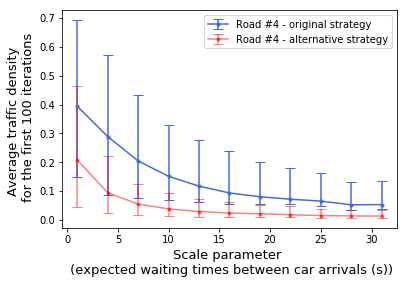

In [234]:
plt.errorbar(scales, [np.mean(i) for i in traffic_density_road4], np.transpose([[np.percentile(i, 2.5), np.percentile(i, 97.5)] for i in traffic_density_road1]), marker='.', color='royalblue', capsize=5, label = 'Road #4 - original strategy')
plt.errorbar(scales, [np.mean(i) for i in traffic_density_road_alternative4], np.transpose([[np.percentile(i, 2.5), np.percentile(i, 97.5)] for i in traffic_density_road_alternative4]), marker='.', color='red', capsize=5, alpha=0.5, label = 'Road #4 - alternative strategy')

plt.ylabel('Average traffic density \n for the first 100 iterations', size=13)
plt.xlabel('Scale parameter \n (expected waiting times between car arrivals (s))', size=13)
plt.legend()
plt.show()

In [330]:
road1

['................-3...............-2.................',
 '1...............-3...............-2.................',
 '1.2.............-3...............-2.................',
 '51...3..........-3...............-2.................',
 '3..2.....4......-3...............-2.................',
 '..2...3.......5.-3...............-2.................',
 '.....3....4.....-3..5............-2.................',
 '.........4.....5-3.......5.......-2.................',
 '..............5.-3............5..-2.................',
 '5...............-3..5...........0-2.................',
 '.....5..........-3.......5......0-2.................',
 '..........5.....-3............5.0-2.................',
 '1..............5-3.............10-2.................',
 '..2.............-3...5.........00-2.................',
 '.....3..........-3........5....00-2.................',
 '.........4......-3............400-2.................',
 '1.............5.-3............000-2.................',
 '..2.............-3...........

In [331]:
road2

['................-2...............-3.................',
 '3...............-2...............-3.................',
 '...3............-2...............-3.................',
 '.......4........-2...............-3.................',
 '............5...-2...............-3.................',
 '...............0-2...............-3.................',
 '...............0-2...............-3.................',
 '...............0-2...............-3.................',
 '...............0-2...5...........-3.................',
 '...............0-2........5......-3.................',
 '...............0-2.............5.-2.................',
 '...............0-2..............0-2.................',
 '...............0-2..............0-2.................',
 '...............0-2..............0-2.................',
 '...............0-2..............0-2.................',
 '...............0-2..............0-21................',
 '...............0-2..............0-2..2..............',
 '...............0-2..5........

In [332]:
road3

['................-3...............-2.................',
 '4...............-3...............-2.................',
 '.....5..........-3...............-2.................',
 '.........4......-3...............-2.................',
 '.............4..-3...............-2.................',
 '................-34..............-2.................',
 '................-3.....5.........-2.................',
 '................-3..........5....-2.................',
 '................-3..............0-2.................',
 '................-3..............0-2.................',
 '................-3..............0-2.................',
 '................-3..............0-2.................',
 '................-3..............0-2.................',
 '................-3..............0-2.................',
 '................-3..............0-2.................',
 '................-3...............-3.................',
 '................-3...............-3.................',
 '................-3...........

In [333]:
road4

['................-2...............-3.................',
 '4...............-2...............-3.................',
 '.....5..........-2...............-3.................',
 '..........5.....-2...............-3.................',
 '2..............5-2...............-3.................',
 '...3...........0-2...............-3.................',
 '3......4.......0-2...............-3.................',
 '...3........5..0-2...............-3.................',
 '.......4......20-2...............-3.................',
 '............5.00-2...............-3.................',
 '1............100-2...............-2.................',
 '..2..........000-2...............-2.................',
 '.....3.......000-2...............-2.................',
 '.........4...000-2...............-2.................',
 '5...........3000-2...............-2.................',
 '.....5......0000-2...............-2.................',
 '4.........5.0000-2...............-2.................',
 '.....5.....10000-2...........